In [39]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [89]:
colors = ['red', 'orange', 'green', 'blue']
log10ztr_table = [2,3,4,5]
f_SIDM_table = [0.01, 0.03, 0.05, 0.1]
log10Gamma_table = [-3, -1, 1, 3]
omega_dm_best = 0.12

In [88]:
common_settings_DCDM = {'omega_b':0.0223828,'100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0,'non linear':'halofit'}

common_settings_LCDM = {'omega_b':0.0223828, '100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0,'non linear':'halofit'}

Text(0, 0.5, '$C_{l,\\mathrm{COFI}}/C_{l, \\Lambda\\mathrm{CDM}}$')

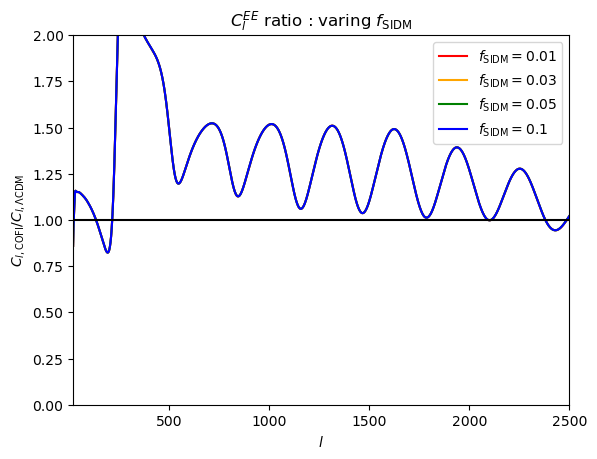

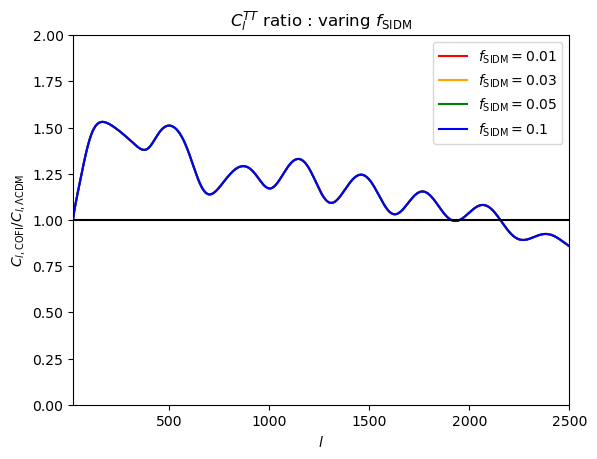

In [95]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in range(4):
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 0.1/f_SIDM_table[i],'omega_ini_dcdm': 0.1 ,'Gamma_dcdm': 1e3, 'a_tr':1/(1+1000)})
    COFI.compute()
    back = COFI.get_background()
    omega_cdm_LCDM = (back['(.)rho_dcdm'] + back['(.)rho_dr'])/back['(.)rho_crit']
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : omega_cdm_LCDM[-1]})
    LCDM.compute()
    
    cls_LCDM = LCDM.lensed_cl(2500)
    cls_COFI = COFI.lensed_cl(2500)
    
    ll = cls_LCDM['ell'][2:]
    ee_LCDM = cls_LCDM['ee'][2:]
    ee_COFI = cls_COFI['ee'][2:]
    tt_LCDM = cls_LCDM['tt'][2:]
    tt_COFI = cls_COFI['tt'][2:]
    
    ax1.plot(ll, ee_COFI/ee_LCDM, color = colors[i], label = r'$f_{\mathrm{SIDM}}=$'+'{}'.format(f_SIDM_table[i]))
    ax2.plot(ll, tt_COFI/tt_LCDM, color = colors[i], label = r'$f_{\mathrm{SIDM}}=$'+'{}'.format(f_SIDM_table[i]))
    COFI.struct_cleanup()
    LCDM.struct_cleanup()
    
ax1.set_xlim(20, 2500)
ax1.set_ylim(0, 2)
ax1.legend(loc = 0)
ax1.hlines(1, 20, 2500, color = 'k')
ax1.set_title(r'$C_l^{EE}$ ratio : varing $f_{\mathrm{SIDM}}$')
ax1.set_xlabel(r'$l$')
ax1.set_ylabel(r'$C_{l,\mathrm{COFI}}/C_{l, \Lambda\mathrm{CDM}}$')
ax2.set_xlim(20, 2500)
ax2.set_ylim(0, 2)
ax2.legend(loc = 0)
ax2.hlines(1, 20, 2500, color = 'k')
ax2.set_title(r'$C_l^{TT}$ ratio : varing $f_{\mathrm{SIDM}}$')
ax2.set_xlabel(r'$l$')
ax2.set_ylabel(r'$C_{l,\mathrm{COFI}}/C_{l, \Lambda\mathrm{CDM}}$')
        

Text(0, 0.5, '$C_{l,\\mathrm{COFI}}/C_{l, \\Lambda\\mathrm{CDM}}$')

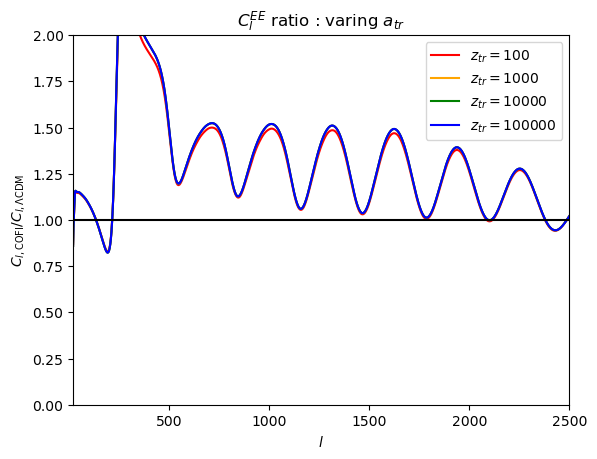

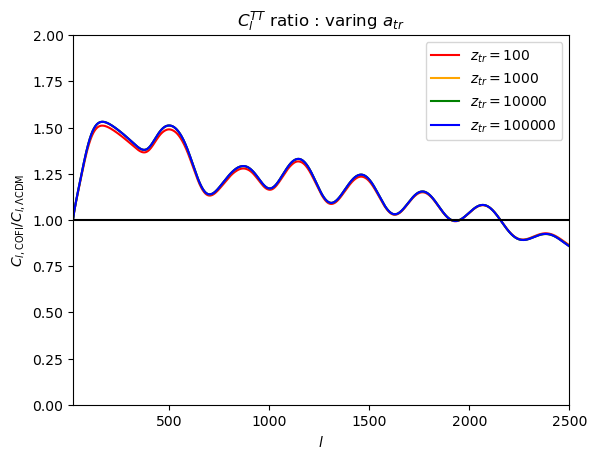

In [102]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in range(4):
    z = 10**log10ztr_table[i]
    a_tr = 1/(1+z)
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 5,'omega_ini_dcdm': 0.1 ,'Gamma_dcdm': 1e3, 'a_tr':a_tr})
    COFI.compute()
    back = COFI.get_background()
    omega_cdm_LCDM = (back['(.)rho_dcdm'] + back['(.)rho_dr'])/back['(.)rho_crit']
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : omega_cdm_LCDM[-1]})
    LCDM.compute()
    
    cls_LCDM = LCDM.lensed_cl(2500)
    cls_COFI = COFI.lensed_cl(2500)
    
    ll = cls_LCDM['ell'][2:]
    ee_LCDM = cls_LCDM['ee'][2:]
    ee_COFI = cls_COFI['ee'][2:]
    tt_LCDM = cls_LCDM['tt'][2:]
    tt_COFI = cls_COFI['tt'][2:]
    
    ax1.plot(ll, ee_COFI/ee_LCDM, color = colors[i], label = r'$z_{tr}=$'+'{}'.format(10**log10ztr_table[i]))
    ax2.plot(ll, tt_COFI/tt_LCDM, color = colors[i], label = r'$z_{tr}=$'+'{}'.format(10**log10ztr_table[i]))    
    
ax1.set_xlim(20, 2500)
ax1.set_ylim(0, 2)
ax1.legend(loc = 0)
ax1.hlines(1, 20, 2500, color = 'k')
ax1.set_title(r'$C_l^{EE}$ ratio : varing $a_{tr}$')
ax1.set_xlabel(r'$l$')
ax1.set_ylabel(r'$C_{l,\mathrm{COFI}}/C_{l, \Lambda\mathrm{CDM}}$')
ax2.set_xlim(20, 2500)
ax2.set_ylim(0, 2)
ax2.legend(loc = 0)
ax2.hlines(1, 20, 2500, color = 'k')
ax2.set_title(r'$C_l^{TT}$ ratio : varing $a_{tr}$')
ax2.set_xlabel(r'$l$')
ax2.set_ylabel(r'$C_{l,\mathrm{COFI}}/C_{l, \Lambda\mathrm{CDM}}$')


Text(0, 0.5, '$C_{l,\\mathrm{COFI}}/C_{l, \\Lambda\\mathrm{CDM}}$')

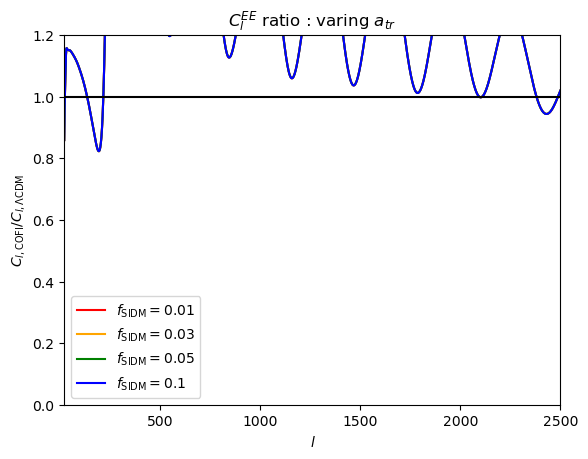

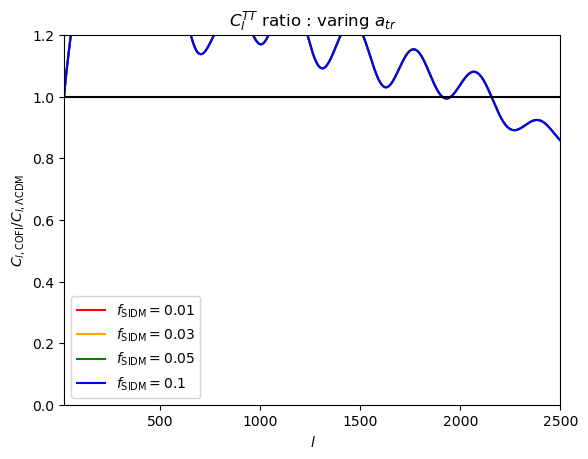

In [104]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in range(4):
    Gamma0 = 10**log10Gamma_table[i]
    a_tr = 1/(1+z)
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 10,'omega_ini_dcdm': 0.1 ,'Gamma_dcdm': Gamma0, 'a_tr':1/(1+1000)})
    COFI.compute()
    back = COFI.get_background()
    omega_cdm_LCDM = (back['(.)rho_dcdm'] + back['(.)rho_dr'])/back['(.)rho_crit']
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.set({'omega_cdm' : omega_cdm_LCDM[-1]})
    LCDM.compute()
    
    cls_LCDM = LCDM.lensed_cl(2500)
    cls_COFI = COFI.lensed_cl(2500)
    
    ll = cls_LCDM['ell'][2:]
    ee_LCDM = cls_LCDM['ee'][2:]
    ee_COFI = cls_COFI['ee'][2:]
    tt_LCDM = cls_LCDM['tt'][2:]
    tt_COFI = cls_COFI['tt'][2:]
    
    ax1.plot(ll, ee_COFI/ee_LCDM, color = colors[i], label = r'$f_{\mathrm{SIDM}}=$'+'{}'.format(f_SIDM_table[i]))
    ax2.plot(ll, tt_COFI/tt_LCDM, color = colors[i], label = r'$f_{\mathrm{SIDM}}=$'+'{}'.format(f_SIDM_table[i]))    
    
ax1.set_xlim(20, 2500)
ax1.set_ylim(0, 1.2)
ax1.legend(loc = 0)
ax1.hlines(1, 20, 2500, color = 'k')
ax1.set_title(r'$C_l^{EE}$ ratio : varing $a_{tr}$')
ax1.set_xlabel(r'$l$')
ax1.set_ylabel(r'$C_{l,\mathrm{COFI}}/C_{l, \Lambda\mathrm{CDM}}$')
ax2.set_xlim(20, 2500)
ax2.set_ylim(0, 1.2)
ax2.legend(loc = 0)
ax2.hlines(1, 20, 2500, color = 'k')
ax2.set_title(r'$C_l^{TT}$ ratio : varing $a_{tr}$')
ax2.set_xlabel(r'$l$')
ax2.set_ylabel(r'$C_{l,\mathrm{COFI}}/C_{l, \Lambda\mathrm{CDM}}$')


In [ ]:
cl_LCDM = 